In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# import csv file and save as dataframe
weather_df = pd.read_csv("uber_nyc_enriched.csv")
weather_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [2]:
# rename columns
weather_df = weather_df.rename(columns = {"pickup_dt": "Pickup Date",
                                          "borough": "Borough",
                                          "pickups": "Pickups",
                                          "spd": "Wind Speed (MPH)",
                                          "vsb": "Visibility (Miles)",
                                          "temp": "Temperature (F)",
                                          "dewp": "Dewpoint",
                                          "slp": "Sea Level Pressure",
                                          "pcp01": "1 Hour Precipitation",
                                          "pcp06": "6 Hour Precipitation",
                                          "pcp24": "24 Hour Precipitation",
                                          "sd": "Snow Depth (inches)",
                                          "hday": "Holiday"})
weather_df.head()

,Pickup Date,Borough,Pickups,Wind Speed (MPH),Visibility (Miles),Temperature (F),Dewpoint,Sea Level Pressure,1 Hour Precipitation,6 Hour Precipitation,24 Hour Precipitation,Snow Depth (inches),Holiday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [3]:
# make pickup dataframe based on bad wind

# arbitrary cutoffs for inclement weather: wind > 20 mph, temp < 40 or temp > 85, 24 hour precip >= 1, snow depth >= 2
bad_wind_df = weather_df.dropna()

bad_wind_df = bad_wind_df.loc[(bad_wind_df["Wind Speed (MPH)"] >= 20)]

bad_wind_df = bad_wind_df.dropna()
len(bad_wind_df)

36

In [4]:
# create bad temperature dataframes
bad_hitemp_df = weather_df.dropna()
bad_lotemp_df = weather_df.dropna()

bad_hitemp_df = bad_hitemp_df.loc[(bad_hitemp_df["Temperature (F)"] >= 85)]
bad_lotemp_df = bad_lotemp_df.loc[(bad_lotemp_df["Temperature (F)"] <= 40)]

# append high temp and low temp dataframes creating bad temp dataframe
bad_temp_df = bad_hitemp_df.append(bad_lotemp_df)
len(bad_temp_df)

11298

In [5]:
# create bad precipitation dataframe
bad_precip_df = weather_df.dropna()

bad_precip_df = bad_precip_df.loc[(bad_precip_df["24 Hour Precipitation"] >= 1)]
len(bad_precip_df)

318

In [6]:
# create bad snow weather dataframe
bad_snow_df = weather_df.dropna()

bad_snow_df = bad_snow_df.loc[(bad_snow_df["Snow Depth (inches)"] >= 2)]
len(bad_snow_df)

6966

In [7]:
# append all the bad weather dataframes
bad_weather_df = bad_wind_df.append([bad_temp_df, bad_precip_df, bad_snow_df])
bad_weather_df = bad_weather_df.drop_duplicates()
len(bad_weather_df)

12396

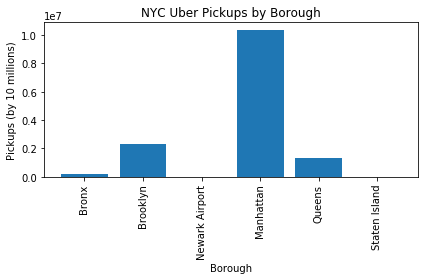

In [8]:
# bar chart for whole dataset

# group initial dataframe by boroughs and set axes for chart
weather_groups = weather_df.groupby("Borough")
x_axis = np.arange(len(weather_groups))
pickups = weather_groups["Pickups"].sum()

# create bar chart
plt.bar(x_axis, pickups)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"], rotation="vertical")
plt.title("NYC Uber Pickups by Borough")
plt.xlabel("Borough")
plt.ylabel("Pickups (by 10 millions)")
plt.tight_layout()
plt.show()

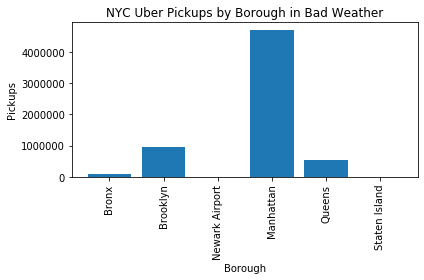

In [9]:
# bar chart for boroughs in bad weather

# group bad weather dataframe by boroughs
bad_weather_groups = bad_weather_df.groupby("Borough")
x_axis = np.arange(len(bad_weather_groups))
bad_pickups = bad_weather_groups["Pickups"].sum()

# create bar chart
plt.bar(x_axis, bad_pickups)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"], rotation="vertical")
plt.title("NYC Uber Pickups by Borough in Bad Weather")
plt.xlabel("Borough")
plt.ylabel("Pickups")
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x1abd5a81438>,
 [Text(3.2961227825485495, 0.15992061269395377, 'Bronx'),
  Text(2.7080111925974553, 1.8859149982878094, 'Brooklyn'),
  Text(1.4386343052725548, 2.9699042637251716, 'Newark Airport'),
  Text(-3.2353907656197345, -0.8687615286961946, 'Manhattan'),
  Text(3.1535204413149014, -0.9722699348478643, 'Queens'),
  Text(3.299996124516616, -0.0050574870554697384, 'Staten Island')],
 [Text(1.7978851541173901, 0.08722942510579296, '1.5%'),
  Text(1.4770970141440662, 1.0286809081569868, '16.3%'),
  Text(0.784709621057757, 1.6199477802137296, '0.0%'),
  Text(-1.786708333252689, -0.47976382927998795, '72.7%'),
  Text(1.7201020588990368, -0.5303290553715623, '9.4%'),
  Text(1.799997886099972, -0.002758629302983493, '0.0%')])

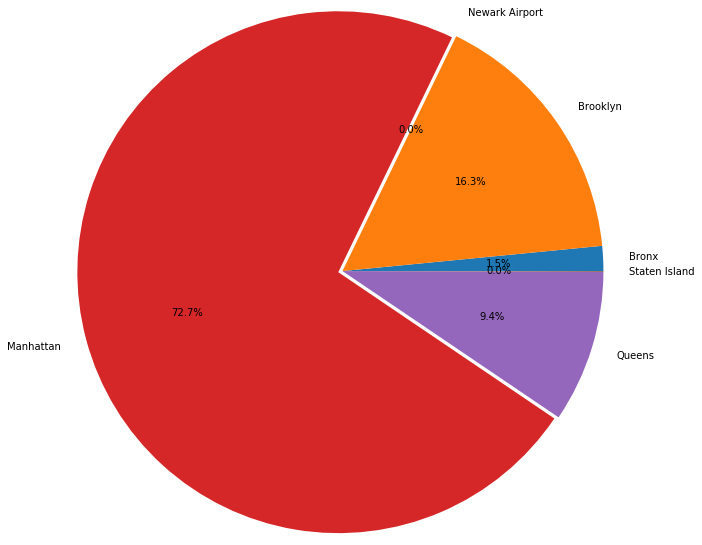

In [20]:
# create pie chart for whole data set

labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black"]
pickups = weather_groups["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups, explode=explode, labels = labels, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x16f31e39f28>,
 [Text(3.297237006021346, 0.13501157773833247, 'Bronx'),
  Text(2.7986683860923756, 1.7485580529931222, 'Brooklyn'),
  Text(1.6845759678071113, 2.8376405354954204, 'Newark Airport'),
  Text(-3.249931994022141, -0.8126758481899602, 'Manhattan'),
  Text(3.177048233774683, -0.8923925819218637, 'Queens'),
  Text(3.2999970890496693, -0.004383179634841232, 'Staten Island')],
 [Text(1.7984929123752793, 0.07364267876636316, '1.3%'),
  Text(1.5265463924140228, 0.9537589379962482, '15.2%'),
  Text(0.9188596188038787, 1.5478039284520473, '0.0%'),
  Text(-1.7947385638629731, -0.4487911400452019, '74.9%'),
  Text(1.7329354002407358, -0.4867595901391983, '8.6%'),
  Text(1.7999984122089103, -0.0023908252553679443, '0.0%')])

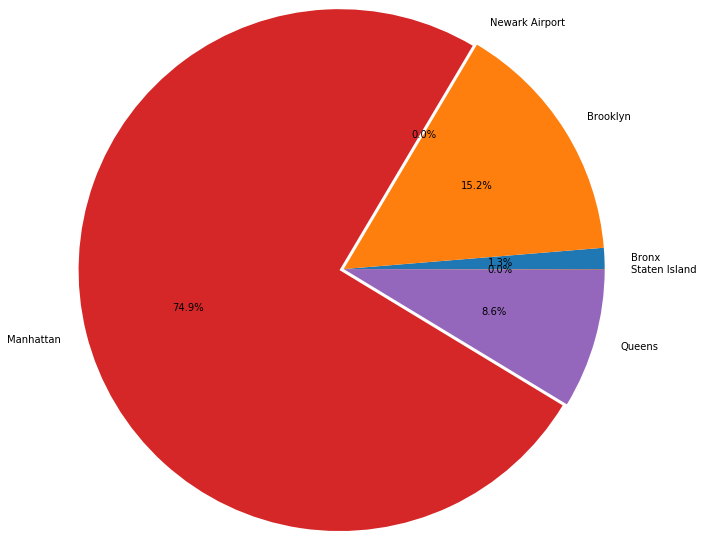

In [10]:
# create pie chart for bad weather data set

labels = labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black", "green"]
bad_pickups = bad_weather_groups["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(bad_pickups, explode=explode, labels = labels, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x1abd5103278>,
 [Text(3.2963282740868647, 0.15562747011859648, 'Bronx'),
  Text(2.7421227537331787, 1.8359637260737944, 'Brooklyn'),
  Text(1.5389179347449797, 2.9192005052959704, 'Newark Airport'),
  Text(-3.2548250713076685, -0.7928516602663029, 'Manhattan'),
  Text(3.1471396094211785, -0.9927297108540231, 'Queens'),
  Text(3.2999954381090992, -0.005487117561556216, 'Staten Island')],
 [Text(1.7979972404110167, 0.08488771097377988, '1.5%'),
  Text(1.4957033202180972, 1.0014347596766149, '15.8%'),
  Text(0.8394097825881707, 1.5922911847068926, '0.0%'),
  Text(-1.7974407110206523, -0.4378434541769135, '73.0%'),
  Text(1.7166216051388243, -0.5414889331931034, '9.6%'),
  Text(1.7999975116958722, -0.002992973215394299, '0.1%')])

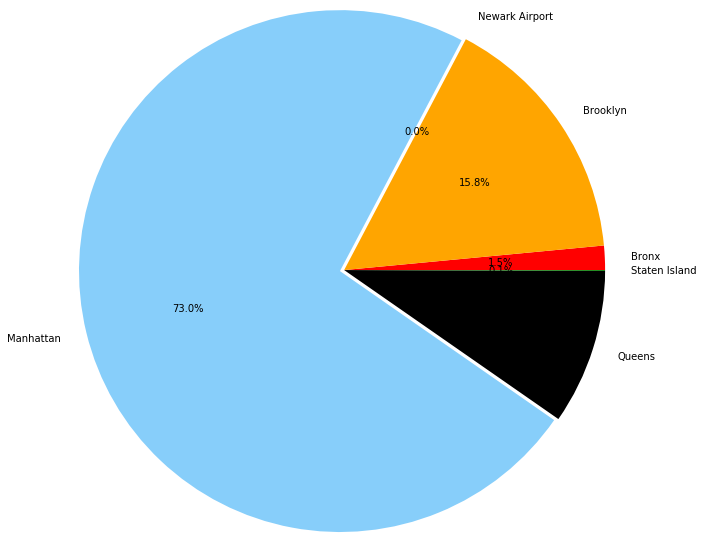

In [12]:
# HIGH TEMPERATURE PIE CHART
hi_temp = bad_hitemp_df.groupby("Borough")
labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black", "green"]
pickups_hot = hi_temp["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups_hot, explode=explode, labels = labels, colors = colors, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x1abd5160be0>,
 [Text(3.2973170389391893, 0.1330426424921675, 'Bronx'),
  Text(2.7970325418215833, 1.75117359504736, 'Brooklyn'),
  Text(1.6758770335131206, 2.8427866906511405, 'Newark Airport'),
  Text(-3.244993445019868, -0.8321763886208812, 'Manhattan'),
  Text(3.181015578957861, -0.878145709109477, 'Queens'),
  Text(3.299997121455631, -0.0043587136346220174, 'Staten Island')],
 [Text(1.798536566694103, 0.0725687140866368, '1.3%'),
  Text(1.5256541137208635, 0.9551855972985598, '15.2%'),
  Text(0.9141147455526111, 1.5506109221733493, '0.0%'),
  Text(-1.7920113054587328, -0.45956009520854624, '74.9%'),
  Text(1.7350994067042875, -0.47898856860516914, '8.5%'),
  Text(1.7999984298848895, -0.002377480164339282, '0.0%')])

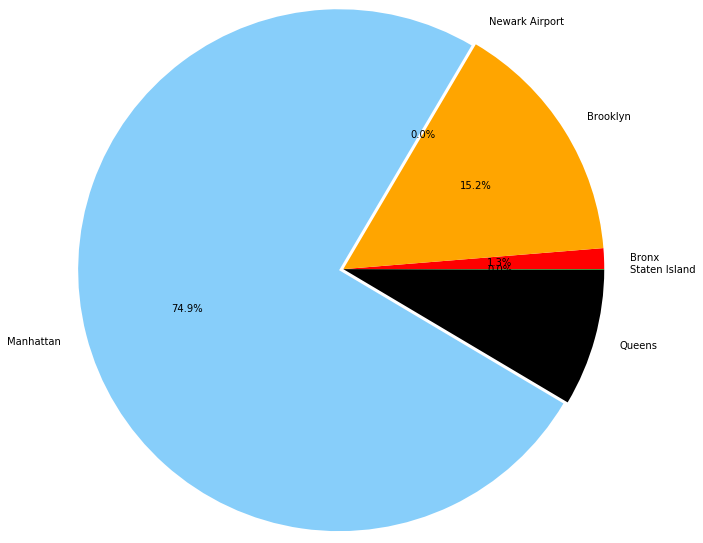

In [13]:
# LOW TEMPERATURE PIE CHART
low_temp = bad_lotemp_df.groupby("Borough")
labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black", "green"]
pickups_cold = low_temp["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups_cold, explode=explode, labels = labels, colors = colors, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x1abd54d45f8>,
 [Text(3.2974786302687287, 0.1289755128738515, 'Bronx'),
  Text(2.859256518191806, 1.6476201513630717, 'Brooklyn'),
  Text(1.8727074818112055, 2.717161512970536, 'Newark Airport'),
  Text(-3.261948337845746, -0.763015754244548, 'Manhattan'),
  Text(3.193127992257968, -0.8330267853188155, 'Queens'),
  Text(3.2999971986005536, -0.004299910289544692, 'Staten Island')],
 [Text(1.7986247074193062, 0.07035027974937354, '1.2%'),
  Text(1.5595944644682578, 0.8987019007434935, '14.2%'),
  Text(1.0214768082606573, 1.4820880979839286, '0.0%'),
  Text(-1.8013744552282476, -0.42136690906042196, '76.5%'),
  Text(1.741706177595255, -0.45437824653753567, '8.0%'),
  Text(1.7999984719639381, -0.0023454056124789222, '0.0%')])

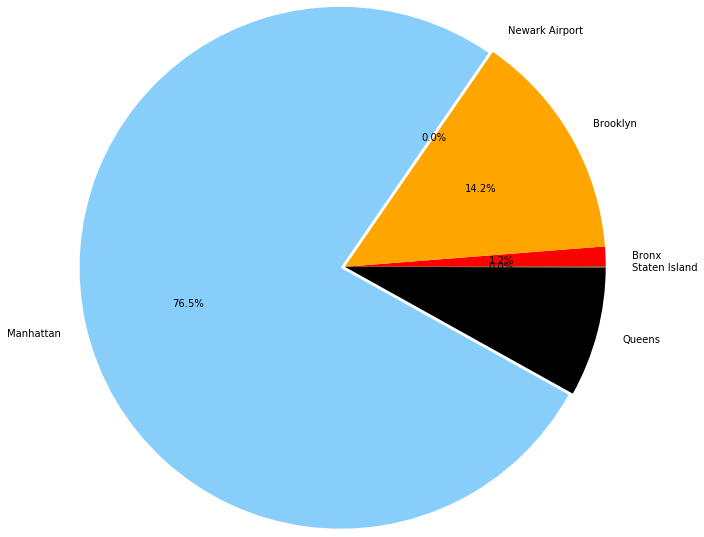

In [14]:
# HIGH WIND PIE CHART
wind = bad_wind_df.groupby("Borough")
labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black", "green"]
pickups_wind = wind["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups_wind, explode=explode, labels = labels, colors = colors, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x1abd552ffd0>,
 [Text(3.2957852088315116, 0.16673289191827337, 'Bronx'),
  Text(2.75320847032832, 1.8192974245329963, 'Brooklyn'),
  Text(1.5937326260723483, 2.8896394786534425, 'Newark Airport'),
  Text(-3.2864846367231757, -0.6492447401269716, 'Manhattan'),
  Text(3.1111857932307525, -1.1002376834116956, 'Queens'),
  Text(3.2999960209291253, -0.005124631883562149, 'Staten Island')],
 [Text(1.797701022999006, 0.09094521377360364, '1.6%'),
  Text(1.501750074724538, 0.9923440497452705, '15.4%'),
  Text(0.8693087051303717, 1.5761669883564229, '0.0%'),
  Text(-1.8149243516232458, -0.3585381400701186, '72.3%'),
  Text(1.6970104326713193, -0.6001296454972884, '10.7%'),
  Text(1.7999978295977044, -0.0027952537546702626, '0.0%')])

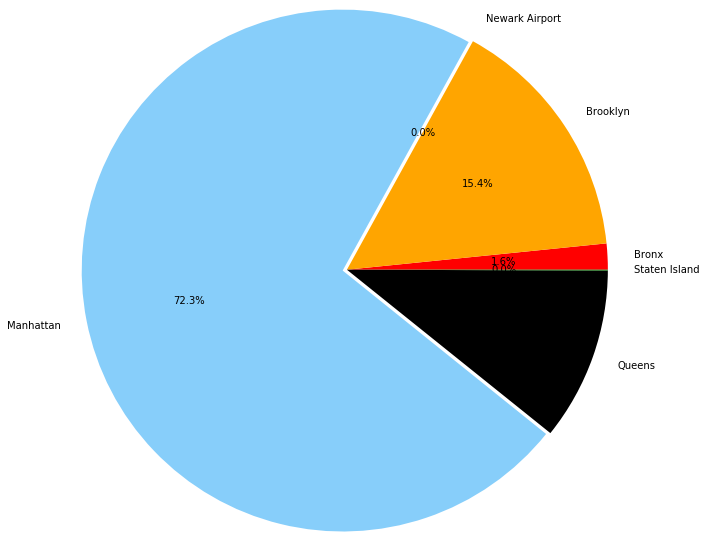

In [15]:
# PRECIPITATION PIE CHART
precip = bad_precip_df.groupby("Borough")
labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black", "green"]
pickups_precip = precip["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups_precip, explode=explode, labels = labels, colors = colors, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x1abd48853c8>,
 [Text(3.2973052887211307, 0.1333335403102394, 'Bronx'),
  Text(2.8256330028753496, 1.7046401770055861, 'Brooklyn'),
  Text(1.769533771938549, 2.7854533257566767, 'Newark Airport'),
  Text(-3.2567978949700236, -0.7847085263451807, 'Manhattan'),
  Text(3.1828660897126597, -0.8714146286109989, 'Queens'),
  Text(3.2999974538997185, -0.004099299376336904, 'Staten Island')],
 [Text(1.798530157484253, 0.07272738562376693, '1.3%'),
  Text(1.541254365204736, 0.9298037329121377, '14.7%'),
  Text(0.9652002392392084, 1.5193381776854598, '0.0%'),
  Text(-1.798530180804341, -0.43334649962345795, '75.5%'),
  Text(1.736108776206905, -0.4753170701514539, '8.4%'),
  Text(1.799998611218028, -0.0022359814780019472, '0.0%')])

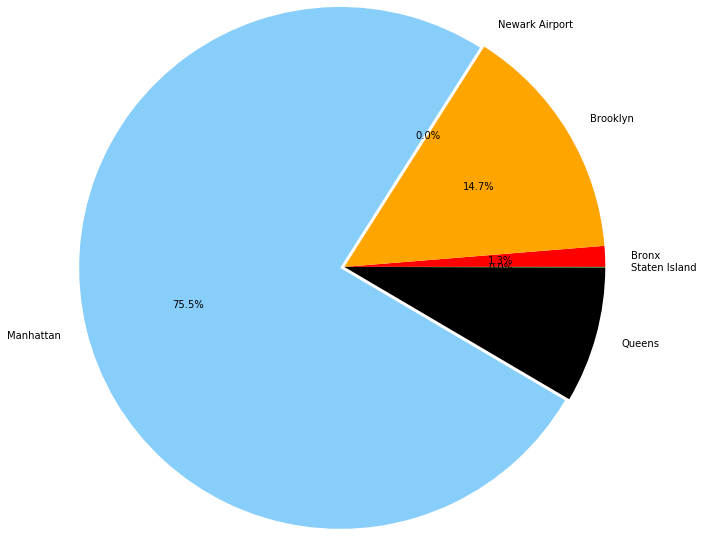

In [16]:
# SNOW PIE CHART
snow = bad_snow_df.groupby("Borough")
labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black", "green"]
pickups_snow = snow["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups_snow, explode=explode, labels = labels, colors = colors, autopct = "%1.1f%%", radius = 3)

In [17]:
stats.ttest_ind(pickups, pickups_weather, equal_var = False)

# pvalue of 48.5% indicates that the discrepancies in data are mostly due to data randomness, therefore weather does NOT
# seem to be an influence on where people are going to be picked up

# still want to work on gross pickups vs bad weather pickups and compare usage rates

Ttest_indResult(statistic=0.7371651556664048, pvalue=0.48503783358224295)